# Практическое задание - 2

<ol>
    <li>Попробуйте обучить нейронную сеть на Keras на Fashion-MNIST датасете. 
        Опишите в комментарии к уроку - какой результата вы добились от нейросети? Что помогло вам улучшить ее точность?</li>
</ol>

# Введение в искусственные нейронные сети
# Урок 2. Keras

In [95]:
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.datasets import fashion_mnist

In [96]:
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

In [97]:
# Normalize the images.
train_images = (train_images / 255)*2-1
test_images = (test_images / 255)*2-1

# Flatten the images.
train_images = train_images.reshape((-1, 28*28))
test_images = test_images.reshape((-1, 28*28))

print(train_images.shape) # (60000, 784)
print(test_images.shape)  # (10000, 784)

(60000, 784)
(10000, 784)


In [98]:
names = {0: 'T-shirt/top',
         1: 'Trouser',
         2: 'Pullover',
         3: 'Dress',
         4: 'Coat',
         5: 'Sandal',
         6: 'Shirt',
         7: 'Sneaker',
         8: 'Bag',
         9: 'Ankle boot'}

def numpy_value_counts(array):
    counts=np.bincount(array)
    index = np.nonzero(counts)[0]
    return dict(zip([names[i]  for i in index], counts[index]))

numpy_value_counts(train_labels)

{'Ankle boot': 6000,
 'Bag': 6000,
 'Coat': 6000,
 'Dress': 6000,
 'Pullover': 6000,
 'Sandal': 6000,
 'Shirt': 6000,
 'Sneaker': 6000,
 'T-shirt/top': 6000,
 'Trouser': 6000}

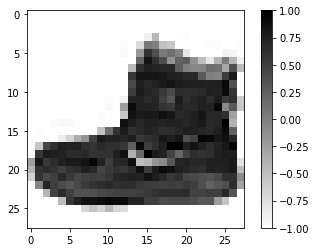

In [99]:
plt.figure()
plt.imshow(train_images[0].reshape(28,28), cmap='binary')
plt.colorbar()
plt.grid(False)
plt.show()


In [100]:
# The full neural network code!
###############################
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
from keras.utils import to_categorical

In [79]:
# Build the model.
model = Sequential()
model.add(Dense(30, activation='relu', input_shape=(784,)))
#model.add(Dense(30, activation='relu'))
model.add(Dense(60, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [80]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 30)                23550     
_________________________________________________________________
dense_18 (Dense)             (None, 60)                1860      
_________________________________________________________________
dense_19 (Dense)             (None, 10)                610       
Total params: 26,020
Trainable params: 26,020
Non-trainable params: 0
_________________________________________________________________


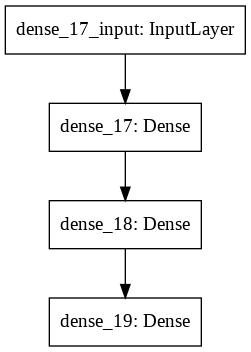

In [81]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

In [82]:
# Train the model.
history = model.fit(
  train_images,
  to_categorical(train_labels, 10),
  epochs=200,
  batch_size=600, validation_split=0.2
)

# Evaluate the model.
model.evaluate(
  test_images,
  to_categorical(test_labels)
)

Train on 48000 samples, validate on 12000 samples
Epoch 1/200
48000/48000 [==============================] - 1s 12us/step - loss: 1.4822 - accuracy: 0.5791 - val_loss: 0.9149 - val_accuracy: 0.7351
Epoch 2/200
48000/48000 [==============================] - 0s 10us/step - loss: 0.7588 - accuracy: 0.7582 - val_loss: 0.6542 - val_accuracy: 0.7766
Epoch 3/200
48000/48000 [==============================] - 0s 10us/step - loss: 0.6039 - accuracy: 0.7938 - val_loss: 0.5644 - val_accuracy: 0.8060
Epoch 4/200
48000/48000 [==============================] - 0s 10us/step - loss: 0.5373 - accuracy: 0.8184 - val_loss: 0.5172 - val_accuracy: 0.8207
Epoch 5/200
48000/48000 [==============================] - 0s 10us/step - loss: 0.4986 - accuracy: 0.8295 - val_loss: 0.4904 - val_accuracy: 0.8292
Epoch 6/200
48000/48000 [==============================] - 0s 10us/step - loss: 0.4678 - accuracy: 0.8412 - val_loss: 0.4644 - val_accuracy: 0.8384
Epoch 7/200
48000/48000 [==============================] - 0s 

[0.4639554845869541, 0.8677999973297119]

Text(0.5, 1.0, 'History - Accuracy')

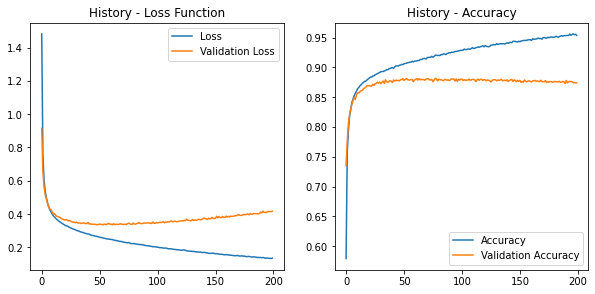

In [83]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('History - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('History - Accuracy')

С увеличением числа эпох оучения, точность на тренировочной выборке растет, а точность на валдиационной выборке замедляется, и даже начинает немного уменьшаться, прослеживается эффект переоучения. Оптимальым в данном случае будет количество эпох около 30.

Попробуем другую архитектуру и соотношение batch_size и  epochs

In [110]:
# Build the model.
model = Sequential()
model.add(Dense(600, activation='relu', input_shape=(784,)))
model.add(Dense(300, activation='relu'))
model.add(Dense(60, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model.
history = model.fit(
  train_images,
  to_categorical(train_labels, 10),
  epochs=100,
  batch_size=3000, validation_split=0.2
)

# Evaluate the model.
model.evaluate(
  test_images,
  to_categorical(test_labels)
)

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 3s 62us/step - loss: 1.3216 - accuracy: 0.6285 - val_loss: 0.8355 - val_accuracy: 0.7538
Epoch 2/100
48000/48000 [==============================] - 3s 60us/step - loss: 0.7399 - accuracy: 0.7747 - val_loss: 0.6517 - val_accuracy: 0.8009
Epoch 3/100
48000/48000 [==============================] - 3s 60us/step - loss: 0.5982 - accuracy: 0.8192 - val_loss: 0.5563 - val_accuracy: 0.8253
Epoch 4/100
48000/48000 [==============================] - 3s 60us/step - loss: 0.5221 - accuracy: 0.8387 - val_loss: 0.5024 - val_accuracy: 0.8391
Epoch 5/100
48000/48000 [==============================] - 3s 60us/step - loss: 0.4762 - accuracy: 0.8493 - val_loss: 0.4659 - val_accuracy: 0.8503
Epoch 6/100
48000/48000 [==============================] - 3s 60us/step - loss: 0.4404 - accuracy: 0.8585 - val_loss: 0.4422 - val_accuracy: 0.8539
Epoch 7/100
48000/48000 [==============================] - 3s 

[0.5224625274982303, 0.8773999810218811]

Text(0.5, 1.0, 'History - Accuracy')

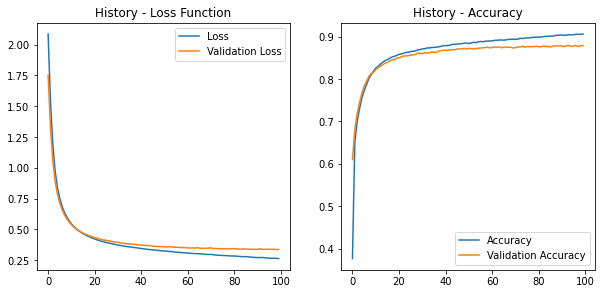

In [106]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('History - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('History - Accuracy')

Так же видно, как на train точность растет, а на валидации выходит на асимптоту.

Оценим предсказания на тестовой выборке.

In [111]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [112]:
test_pred = np.argmax(model.predict(test_images), axis=1)

In [113]:
print(classification_report(test_labels, test_pred))

              precision    recall  f1-score   support

           0       0.91      0.69      0.79      1000
           1       0.99      0.97      0.98      1000
           2       0.85      0.74      0.80      1000
           3       0.87      0.90      0.88      1000
           4       0.82      0.80      0.81      1000
           5       0.96      0.97      0.97      1000
           6       0.60      0.84      0.70      1000
           7       0.96      0.94      0.95      1000
           8       0.97      0.95      0.96      1000
           9       0.95      0.97      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.89      0.88      0.88     10000
weighted avg       0.89      0.88      0.88     10000



In [114]:
print(confusion_matrix(test_labels, test_pred))

[[691   1  13  34   6   0 245   0  10   0]
 [  2 966   2  22   4   0   4   0   0   0]
 [ 12   0 745  12 105   0 124   0   2   0]
 [  8   4  15 902  25   0  42   0   4   0]
 [  0   0  50  31 802   0 115   0   2   0]
 [  0   0   1   1   0 972   0  12   1  13]
 [ 41   1  47  30  37   0 838   0   6   0]
 [  0   0   0   0   0  28   0 939   0  33]
 [  5   0   1   7   5   2  23   6 951   0]
 [  0   0   0   0   0   9   1  22   0 968]]


In [115]:
# Save the model to disk.
model.save_weights('model.h5')

# Load the model from disk later using:
# model.load_weights('model.h5')


Точность модели удалось повысить благодаря добавлению новых слоев и настройке параметров batch_size и  epochs